## Data Analysis:  Bubonic Plague Today

Datasets:

- https://data.cdc.gov/browse?q=plague&sortBy=relevance
- https://plos.figshare.com/articles/dataset/Full_dataset_/24538288?file=43101766

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
plague_df1 = pd.read_csv('../data/Plague_cases_2018.csv')
plague_df1.head()

,Disease,MMWR year,MMWR week,Current week,"Current week, flag",Cum 2018,"Cum 2018, flag",5-year weekly average§,"5-year weekly average§, flag",Total cases reported for pervious years 2017,"Total cases reported for pervious years 2017, flag",Total cases reported for pervious years 2016,"Total cases reported for pervious years 2016, flag",Total cases reported for pervious years 2015,"Total cases reported for pervious years 2015, flag",Total cases reported for pervious years 2014,"Total cases reported for pervious years 2014, flag",Total cases reported for pervious years 2013,"Total cases reported for pervious years 2013, flag",States reporting cases during current week (No.)
0,Anthrax,2018.0,1.0,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN
1,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,6.0,NaN,115.0,NaN,247.0,NaN,896.0,NaN,NaN,NN,NaN,NN,NaN
2,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,0.0,NaN,3.0,NaN,7.0,NaN,6.0,NaN,8.0,NaN,8.0,NaN,NaN
3,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,0.0,NaN,67.0,NaN,15.0,NaN,11.0,NaN,11.0,NaN,22.0,NaN,NaN
4,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,NaN,-,44.0,NaN,35.0,NaN,55.0,NaN,80.0,NaN,85.0,NaN,NaN


In [ ]:
df1 = plague_df1[plague_df1['Disease'] == 'Plague']
df1 = df1[['Disease', 'MMWR year', '']]
df1.head()

,Disease,MMWR year
36,Plague,2018.0
93,Plague,2018.0
164,Plague,2018.0
242,Plague,2018.0
277,Plague,2018.0


In [82]:
plague_df2 = pd.read_csv('../data/Plague_cases_2017.csv')
df2 = plague_df2[plague_df2['Disease'] == 'Plague']
df2 = df2[['Disease', 'MMWR year']]

In [84]:
plague_df3 = pd.read_csv('../data/Plague_cases_2016.csv')
df3 = plague_df3[plague_df3['Disease'] == 'Plague']
df3 = df3[['Disease', 'MMWR year']]

In [85]:
plague_df4 = pd.read_csv('../data/Plague_cases_2015.csv')
df4 = plague_df4[plague_df4['Disease'] == 'Plague']
df4 = df4[['Disease', 'MMWR year']]

In [86]:
plague_df5 = pd.read_csv('../data/Plague_cases_2014.csv')
df5 = plague_df5[plague_df5['Disease'] == 'Plague']
df5 = df5[['Disease', 'MMWR year']]

In [91]:
combined_df = df1
for df in [df2, df3, df4, df5]:
    combined_df = pd.merge(combined_df, df, how='outer')

In [92]:
combined_df

,Disease,MMWR year
0,Plague,2014.0
1,Plague,2014.0
2,Plague,2014.0
3,Plague,2014.0
4,Plague,2014.0
...,...,...
256,Plague,2018.0
257,Plague,2018.0
258,Plague,2018.0
259,Plague,2018.0


In [97]:
case_counts_by_year = combined_df.groupby('MMWR year').size()
case_counts_by_year = case_counts_by_year.reset_index(name='Case Count')

print(case_counts_by_year)

   MMWR year  Case Count
0     2014.0          53
1     2015.0          51
2     2016.0          52
3     2017.0          52
4     2018.0          53


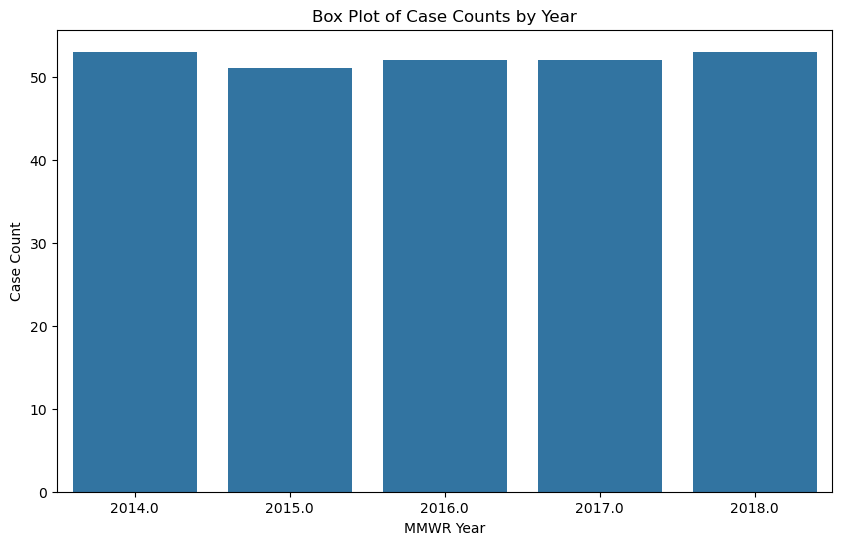

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x=case_counts_by_year['MMWR year'],
            y=case_counts_by_year['Case Count'])

# Set plot labels and title
plt.xlabel('MMWR Year')
plt.ylabel('Case Count')
plt.title('Box Plot of Case Counts by Year')

# Show the plot
plt.show()